In [34]:
import scanpy as sc
import pandas as pd
import scanpy as sc
from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
mtx = "/Users/tenzin/Desktop/projects/biodash/data/filtered_gene_bc_matrices/hg19"

In [3]:
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")


/Users/tenzin/Desktop/projects/.envbiodash/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.9.8 anndata==0.10.5.post1 umap==0.5.5 numpy==1.26.4 scipy==1.12.0 pandas==2.2.0 scikit-learn==1.4.1.post1 statsmodels==0.14.1 pynndescent==0.5.11


In [4]:
results_file = "write/pbmc3k.h5ad"  # the file that will store the analysis results


In [7]:
adata = sc.read_10x_mtx(
    mtx,  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,  # write a cache file for faster subsequent reading
)
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
#top_expressed = sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

# sc.pl.violin(
#     adata,
#     ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
#     jitter=0.4,
#     multi_panel=True,
# )


#sc.pl.scatter(adata, x="total_counts", y="pct_counts_mt")
#sc.pl.scatter(adata, x="total_counts", y="n_genes_by_counts")


adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()


sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)



sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)



# sc.pl.highly_variable_genes(adata)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]


sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])


sc.pp.scale(adata, max_value=10)


... reading from cache file cache/Users-tenzin-Desktop-projects-biodash-data-filtered_gene_bc_matrices-hg19-matrix.h5ad
filtered out 19024 genes that are detected in less than 3 cells
normalizing counts per cell


/Users/tenzin/Desktop/projects/.envbiodash/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


    finished (0:00:00)
extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use


/Users/tenzin/Desktop/projects/.envbiodash/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  disp_grouped = df.groupby("mean_bin")["dispersions"]


    finished (0:00:02)


In [11]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [14]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


In [20]:
adata.obs

,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
AAACATACAACCAC-1,781,779,2419.0,73.0,3.017776
AAACATTGAGCTAC-1,1352,1352,4903.0,186.0,3.793596
AAACATTGATCAGC-1,1131,1129,3147.0,28.0,0.889736
AAACCGTGCTTCCG-1,960,960,2639.0,46.0,1.743085
AAACCGTGTATGCG-1,522,521,980.0,12.0,1.224490
...,...,...,...,...,...
TTTCGAACTCTCAT-1,1155,1153,3459.0,73.0,2.110436
TTTCTACTGAGGCA-1,1227,1224,3443.0,32.0,0.929422
TTTCTACTTCCTCG-1,622,622,1684.0,37.0,2.197150
TTTGCATGAGAGGC-1,454,452,1022.0,21.0,2.054795


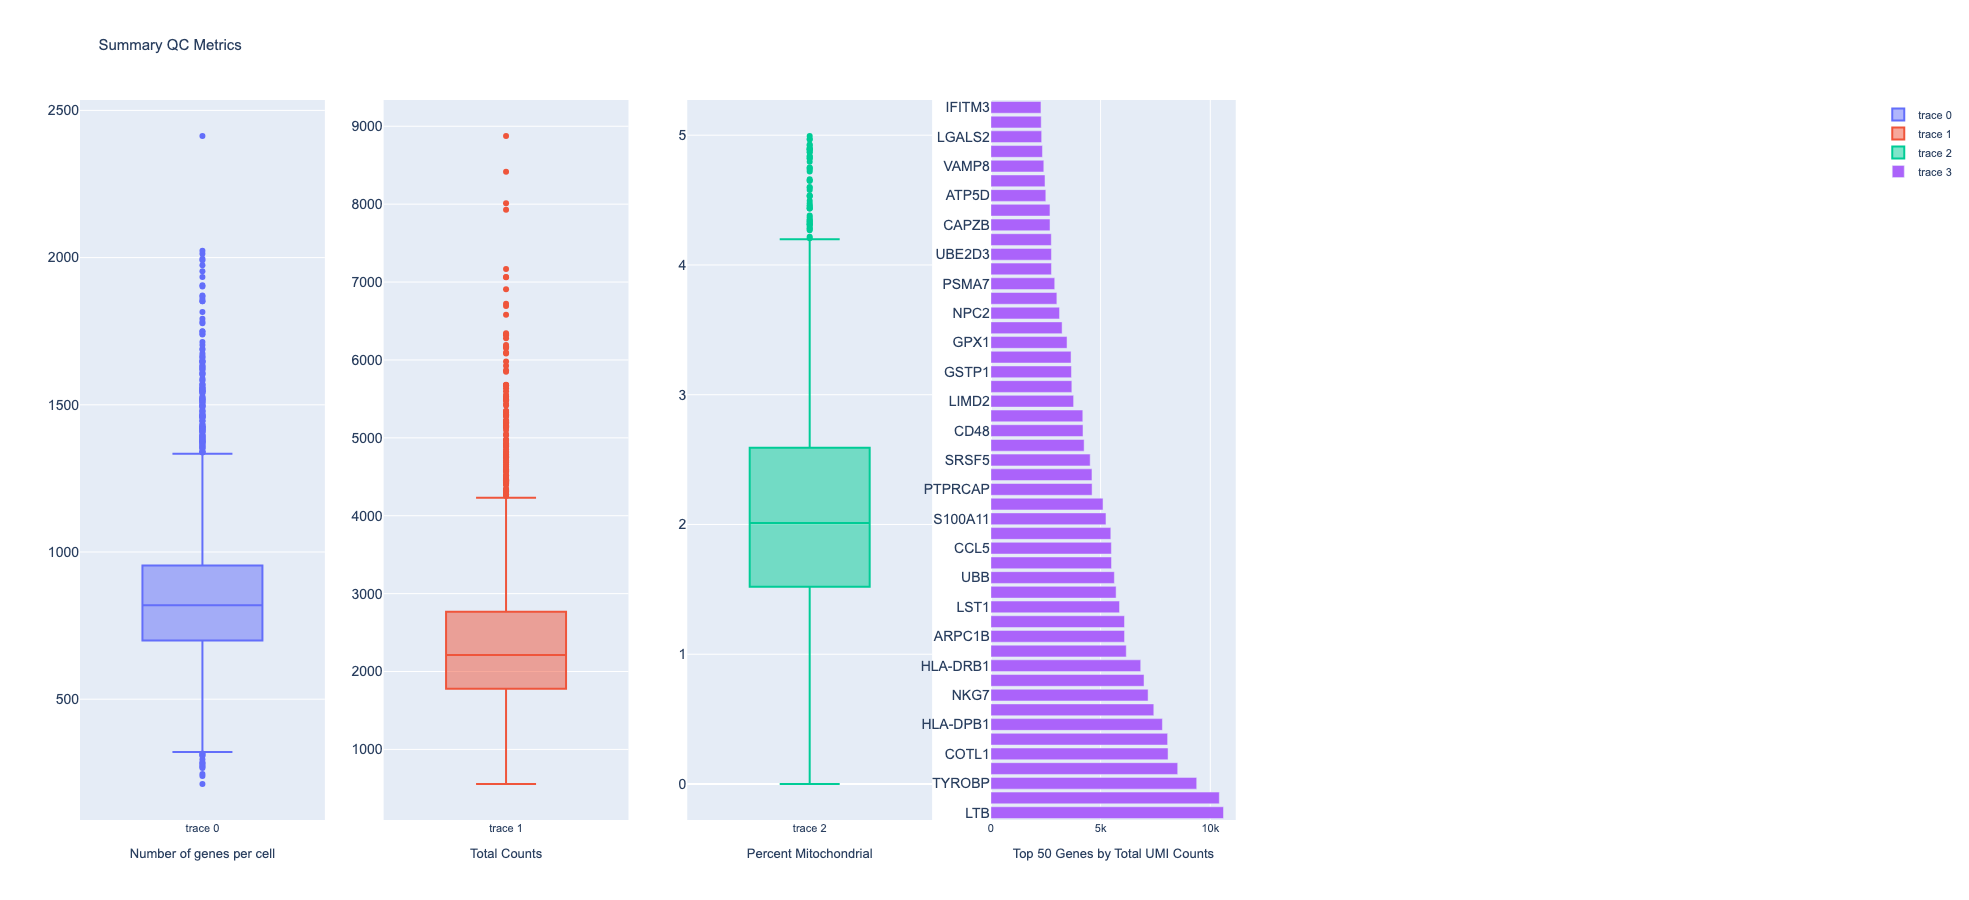

In [39]:


gene_metrics = adata.var.sort_values(by=['total_counts'],ascending=False)[1:100]
gene_metrics['gene'] = gene_metrics.index
gene_metrics_subset = gene_metrics.sort_values(by=['total_counts'], ascending=False)[1:50]



fig = make_subplots(rows=1, cols=6)

fig.add_trace(go.Box(y=adata.obs['n_genes_by_counts']),row=1, col=1)
fig.add_trace(go.Box(y=adata.obs['total_counts']),row=1, col=2)
fig.add_trace(go.Box(y=adata.obs['pct_counts_mt']),row=1, col=3)
fig.add_trace(go.Bar(x=gene_metrics_subset['total_counts'], y=gene_metrics_subset['gene'],orientation='h'),row=1,col=4)

fig.update_layout(yaxis={'categoryorder':'total ascending'}) # add only this line
#fig.add_trace(go.Bar(x=gene_metrics_subset['total_counts'], y=gene_metrics_subset['gene'],orientation='h'),)


fig.update_xaxes(title_text="Number of genes per cell",row=1, col=1)
fig.update_xaxes(title_text="Total Counts", row=1, col=2)
fig.update_xaxes(title_text="Percent Mitochondrial", row=1, col=3)
fig.update_xaxes(title_text="Top 50 Genes by Total UMI Counts", row=1, col=4)


fig.update_layout(height=900, width=2500, title_text="Summary QC Metrics")
#fig.update_traces(boxpoints=False) 
fig.update_yaxes(tickfont_size=14)
fig.update_layout(
    font=dict(
        family="Arial",
        size=11,
    ))
fig.show()

In [58]:
#print(value)

value = '/Users/tenzin/Desktop/projects/biodash/data/filtered_gene_bc_matrices/hg19'
adata = sc.read_10x_mtx(value,  # the directory with the `.mtx` file
var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
cache=True,  # write a cache file for faster subsequent reading
)
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`
#top_expressed = sc.pl.highest_expr_genes(adata, n_top=20)
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True)



adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()


sc.pp.normalize_total(adata, target_sum=1e4)

sc.pp.log1p(adata)



sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)



# sc.pl.highly_variable_genes(adata)
adata.raw = adata
adata = adata[:, adata.var.highly_variable]


sc.pp.regress_out(adata, ["total_counts", "pct_counts_mt"])


sc.pp.scale(adata, max_value=10)


sc.tl.pca(adata, svd_solver='arpack',n_comps=3)
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=3)
sc.tl.umap(adata,n_components =3)
sc.tl.leiden(adata)

# sc.tl.rank_genes_groups(adata, 'leiden', method='t-test')
# result = adata.uns['rank_genes_groups']
# groups = result['names'].dtype.names
    
# ranked_df = pd.DataFrame(
#         {'Cluster ' + group + '_' + key[:1]: result[key][group]
#         for group in groups for key in ['names', 'pvals']})[1:100]

# print(ranked_df.head())
# #adata_obs = adata.obs


# #print(out_url)

# df = pd.DataFrame((adata.obsm['X_umap']))
# df['n_genes'] = adata.obs['n_genes_by_counts'].values
# #df['cell'] = adata.obs['cell_barcodes'].to_list()
# df['leiden'] = adata.obs['leiden'].values
# df.columns = ['X','Y','n_genes_by_counts','leiden']


# print(df.head())


# print('\n')
# print('\n')
# print('\n')
# print('\n')
# print('\n')
# print('\n')
# print('\n')
# print('\n')

... reading from cache file cache/Users-tenzin-Desktop-projects-biodash-data-filtered_gene_bc_matrices-hg19-matrix.h5ad
filtered out 19024 genes that are detected in less than 3 cells


/Users/tenzin/Desktop/projects/.envbiodash/lib/python3.11/site-packages/anndata/__init__.py:51: FutureWarning:

`anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.



normalizing counts per cell
    finished (0:00:00)
extracting highly variable genes


/Users/tenzin/Desktop/projects/.envbiodash/lib/python3.11/site-packages/scanpy/preprocessing/_highly_variable_genes.py:226: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:00:02)
computing PCA
    on highly variable genes
    with n_comps=3
    finished (0:00:01)
computing neighbors
    using 'X_pca' with n_pcs = 3
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:03)
running Leiden clustering
    finished: found 21 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)


In [68]:
df = pd.DataFrame((adata.obsm['X_umap']))
df['n_genes'] = adata.obs['n_genes_by_counts'].values
#df['cell'] = adata.obs['cell_barcodes'].to_list()
df['leiden'] = adata.obs['leiden'].values

In [69]:
df

,0,1,2,n_genes,leiden
0,-3.391299,3.718340,1.403630,779,6
1,-1.599554,0.011681,5.524858,1352,0
2,1.448289,5.303464,1.317931,1129,18
3,12.890438,4.187698,3.337103,960,8
4,2.487380,9.274208,5.778230,521,2
...,...,...,...,...,...
2633,12.427478,3.673826,5.407965,1153,8
2634,2.171144,-1.204063,0.018711,1224,5
2635,1.697941,-2.113458,7.903028,622,4
2636,3.527536,-1.512982,6.897287,452,4


In [73]:
df = pd.DataFrame((adata.obsm['X_umap']))
df['n_genes'] = adata.obs['n_genes_by_counts'].values
#df['cell'] = adata.obs['cell_barcodes'].to_list()
df['leiden'] = adata.obs['leiden'].values
df.columns = ['X','Y','Z','n_genes_by_counts','leiden']

hi there


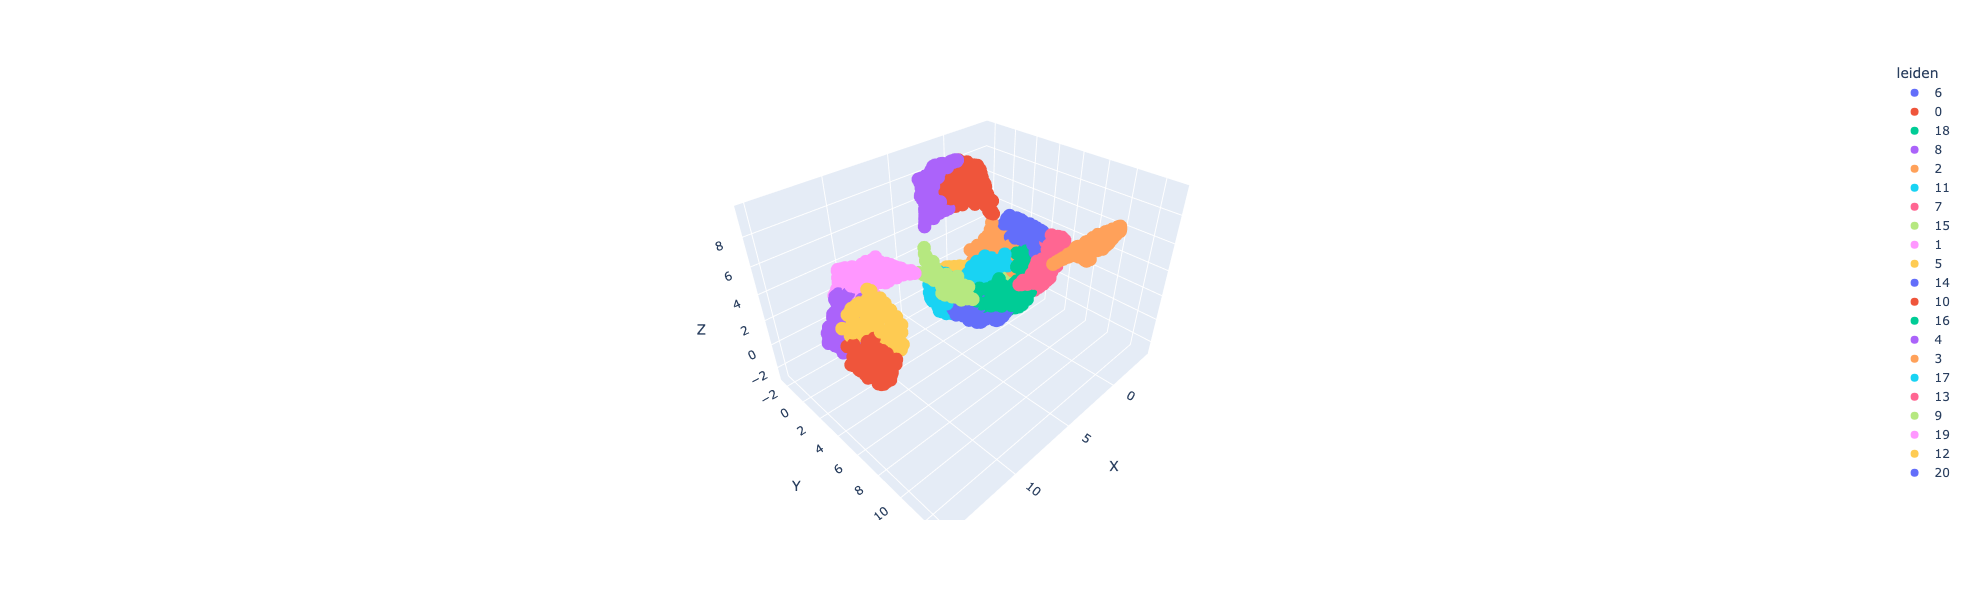

In [78]:
#df = pd.read_json(json_file[0],orient='split')
print('hi there')
fig = px.scatter_3d(df, x='X', y='Y',z='Z',color='leiden',hover_data=['leiden'])
fig.update_layout(height=600, width=800)

In [79]:
ranked_df

,Cluster 0_n,Cluster 0_p,Cluster 1_n,Cluster 1_p,Cluster 2_n,Cluster 2_p,Cluster 3_n,Cluster 3_p,Cluster 4_n,Cluster 4_p,...,Cluster 16_n,Cluster 16_p,Cluster 17_n,Cluster 17_p,Cluster 18_n,Cluster 18_p,Cluster 19_n,Cluster 19_p,Cluster 20_n,Cluster 20_p
1,HLA-DRA,9.562210e-249,FTL,3.250933e-141,GZMB,1.122668e-102,RPS12,3.758284e-60,HLA-DRA,1.363394e-289,...,CD3D,4.179735e-23,RPS27A,3.405466e-22,B2M,6.674303e-15,LGALS1,2.127222e-62,PF4,1.251720e-12
2,CD79A,1.081916e-103,CST3,2.416926e-124,CST7,3.119381e-95,RPS27,1.046929e-62,HLA-DPB1,1.930750e-133,...,RPS27A,1.374550e-22,RPS27,4.354969e-21,CD3D,2.160490e-12,TYROBP,3.413593e-60,PPBP,9.925949e-12
3,HLA-DPB1,1.247892e-122,FTH1,7.351005e-100,CTSW,5.755320e-99,RPS6,2.262572e-56,HLA-DRB1,5.066587e-96,...,IL7R,6.729038e-19,RPL21,5.258618e-21,CCL5,5.981638e-09,FTL,9.107616e-50,CALM3,1.688225e-11
4,CD79B,3.516484e-98,LYZ,1.391570e-82,B2M,6.630853e-113,RPS27A,2.235037e-55,HLA-DPA1,1.485199e-80,...,RPSA,8.415588e-20,RPLP2,1.830890e-19,PTPRCAP,1.584117e-07,LST1,1.705130e-44,NRGN,4.092874e-11
5,HLA-DRB1,1.437815e-118,FCER1G,1.095896e-77,PRF1,7.257412e-86,RPL21,5.682888e-53,CD79A,3.231237e-63,...,RPS12,5.433580e-18,RPS25,3.963713e-19,MALAT1,4.107277e-07,FCER1G,1.102814e-44,SDPR,7.596951e-11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,RPL11,1.056134e-10,PLAUR,1.852077e-13,ANXA1,3.689651e-12,LCK,1.156377e-08,SWAP70,2.210146e-05,...,RPL38,3.161034e-04,UBAC2,1.709686e-03,ISCU,2.663318e-02,NACA,2.792451e-13,GAS2L1,4.129549e-03
96,BLNK,2.181638e-10,RHOG,1.619208e-13,CX3CR1,6.428785e-12,GNB2L1,9.818209e-09,RP11-693J15.5,2.729500e-05,...,MAL,3.563863e-04,SOD1,1.762959e-03,FBXO7,2.710494e-02,EIF4A1,2.965556e-13,PLA2G12A,4.168789e-03
97,LAT2,2.124720e-10,CTSB,2.099805e-13,PTGDR,8.100506e-12,TOMM7,2.173214e-08,CD22,2.715033e-05,...,HSPA8,3.542548e-04,EEF1B2,2.183463e-03,PPM1K,2.713085e-02,ITGB2,4.556106e-13,TSC22D1,4.237418e-03
98,FAIM3,1.996586e-10,ISG15,2.817257e-13,CD300A,9.958476e-12,MT-CYB,4.061289e-08,ARHGAP24,2.852442e-05,...,FXYD5,3.724607e-04,LEF1,2.277854e-03,COPS6,2.726083e-02,ABI3,1.124521e-12,C2orf88,4.302645e-03


In [81]:
ranked_df.round(10)

,Cluster 0_n,Cluster 0_p,Cluster 1_n,Cluster 1_p,Cluster 2_n,Cluster 2_p,Cluster 3_n,Cluster 3_p,Cluster 4_n,Cluster 4_p,...,Cluster 16_n,Cluster 16_p,Cluster 17_n,Cluster 17_p,Cluster 18_n,Cluster 18_p,Cluster 19_n,Cluster 19_p,Cluster 20_n,Cluster 20_p
1,HLA-DRA,0.000000e+00,FTL,0.0,GZMB,0.0,RPS12,0.000000e+00,HLA-DRA,0.000000,...,CD3D,0.000000,RPS27A,0.000000,B2M,0.000000e+00,LGALS1,0.0,PF4,0.000000e+00
2,CD79A,0.000000e+00,CST3,0.0,CST7,0.0,RPS27,0.000000e+00,HLA-DPB1,0.000000,...,RPS27A,0.000000,RPS27,0.000000,CD3D,0.000000e+00,TYROBP,0.0,PPBP,0.000000e+00
3,HLA-DPB1,0.000000e+00,FTH1,0.0,CTSW,0.0,RPS6,0.000000e+00,HLA-DRB1,0.000000,...,IL7R,0.000000,RPL21,0.000000,CCL5,6.000000e-09,FTL,0.0,CALM3,0.000000e+00
4,CD79B,0.000000e+00,LYZ,0.0,B2M,0.0,RPS27A,0.000000e+00,HLA-DPA1,0.000000,...,RPSA,0.000000,RPLP2,0.000000,PTPRCAP,1.584000e-07,LST1,0.0,NRGN,0.000000e+00
5,HLA-DRB1,0.000000e+00,FCER1G,0.0,PRF1,0.0,RPL21,0.000000e+00,CD79A,0.000000,...,RPS12,0.000000,RPS25,0.000000,MALAT1,4.107000e-07,FCER1G,0.0,SDPR,1.000000e-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,RPL11,1.000000e-10,PLAUR,0.0,ANXA1,0.0,LCK,1.160000e-08,SWAP70,0.000022,...,RPL38,0.000316,UBAC2,0.001710,ISCU,2.663318e-02,NACA,0.0,GAS2L1,4.129549e-03
96,BLNK,2.000000e-10,RHOG,0.0,CX3CR1,0.0,GNB2L1,9.800000e-09,RP11-693J15.5,0.000027,...,MAL,0.000356,SOD1,0.001763,FBXO7,2.710494e-02,EIF4A1,0.0,PLA2G12A,4.168789e-03
97,LAT2,2.000000e-10,CTSB,0.0,PTGDR,0.0,TOMM7,2.170000e-08,CD22,0.000027,...,HSPA8,0.000354,EEF1B2,0.002183,PPM1K,2.713085e-02,ITGB2,0.0,TSC22D1,4.237418e-03
98,FAIM3,2.000000e-10,ISG15,0.0,CD300A,0.0,MT-CYB,4.060000e-08,ARHGAP24,0.000029,...,FXYD5,0.000372,LEF1,0.002278,COPS6,2.726083e-02,ABI3,0.0,C2orf88,4.302645e-03
